<center><img src="airbnb_analysis_bangkok.png" alt="Airbnb Data Analysis" style="width:100%;"></center>
<center><h1><b>AIRBNB DATA ANALYSIS</b></h1></center>
<p style="text-align: center;">Image generated by Microsoft Copilot</p>

---


# **1. Introduction**
* **

## **1.1 Background**
Bangkok is one of the most popular travel destinations in the world, attracting millions of tourists annually. With the rise of Airbnb, short-term rental properties have become a key component of the city's hospitality sector. This dataset contains listings of Airbnb properties in Bangkok, including details such as property location, room types, pricing, availability, reviews, and host information.
The dataset provides an opportunity to analyze the current trends, pricing strategies, and guest preferences, helping hosts, businesses, and policymakers make data-driven decisions to improve their offerings and market competitiveness.

## **1.2 Business Problem**

* **Pricing Optimization and Revenue Management:** Analyze pricing patterns across different property types, locations, and features. Implement dynamic pricing strategies, extended stay discounts, and special packages (e.g., travel guide packages) to maximize revenue, especially during peak seasons like December.

* **Market Demand and Booking Trends Analysis:** Understand neighborhood popularity and booking trends by analyzing customer reviews, seasonal demand, and booking patterns. Use these insights to develop targeted marketing campaigns and promotional offers that cater to the preferences of different customer segments.

* **Seasonal Availability and Marketing Strategy Adjustment:** Evaluate seasonal and yearly availability trends to help hosts optimize pricing and marketing strategies. Implement minimum stay requirements, monitor competition, and adjust promotions based on occupancy rates and market conditions to ensure maximum occupancy and revenue throughout the year.

## **1.3. Data Features Description**

| Column Name                          | Description                                                                 |
|--------------------------------------|-----------------------------------------------------------------------------|
| `id`                                 | Unique identifier for each listing.                                         |
| `name`                               | Name or title of the listing.                                               |
| `host_id`                            | Unique identifier for each host.                                            |
| `host_name`                          | Name of the host.                                                           |
| `neighbourhood`                      | Location or neighborhood where the property is listed.                      |
| `latitude` and `longitude`           | Geographic coordinates of the property.                                     |
| `room_type`                          | Type of room (Entire home/apt, Private room, and Shared room).              |
| `price`                              | Cost per night (in the local currency).                                     |
| `minimum_nights`                     | Minimum stay requirement.                                                   |
| `number_of_reviews`                  | Total number of reviews received by the listing.                            |
| `last_review`                        | Date of the last review received.                                           |
| `reviews_per_month`                  | Average number of reviews per month.                                        |
| `calculated_host_listings_count`     | Total number of listings owned by the host.                                 |
| `availability_365`                   | Number of available days in the year for the listing.                       |
| `number_of_reviews_ltm`              | Number of reviews received in the last 12 months.                           |

# **2. Data Preparation**
* **
* **Import necessary libraries**

* **Data Cleaning & Preprocessing: Handle missing values, outliers, and filtering as necessary.**

* **Conduct statistical and visual analysis to address the selected business problems.**

* **Export the cleanead data to a new CSV file for future use.**

## **2.1. Importing Dataset and Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import folium

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [25]:
df = pd.read_csv(r"C:\Users\miqba\OneDrive\Documents\Data Science\Capstone Project\Capston Project 2\Airbnb Listings Bangkok.csv")

## **2.2 Data Summary and Structure**

### **2.2.1 Data Overview**
**Objective: Understand the structure, size, and type of data.**

* **Shape of Data:** Number of rows and columns.

* **Data Types:** Identify numeric, categorical, and date/time features.

* **Missing Values:** Evaluate columns with missing data for imputation or removal.

* **Duplicates:** Check for and handle duplicate rows.

#### **Data Overview Table**
| Aspect                         | Details                                                                      |
|--------------------------------|------------------------------------------------------------------------------|
| **Total Rows**                 | 15,854                                                                       |
| **Total Columns**              | 17                                                                           |
| **Numeric Features**           | price, minimum_nights, number_of_reviews, availability_365, last_review, etc |
| **Categorical Features**       | room_type, neighbourhood, host_name, etc.                                    |
| **Missing Values**             | last_review, reviews_per_month, name, host_name.                             |
| **Duplicates**                 | 0 rows.                                                                      |
| **Unique Listings (IDs)**      | 15,854 (unique IDs).                                                         |
| **Geospatial Information**     | latitude and longitude available for location-based analysis.                |
| **Price Range**                | Min: 0, Max: 1,100,000, Range: 1,100,000 (outliers may need handling).       |

#### **Brief Overview of the DataFrame, Particularly Data Types**

In [26]:
print(f'This dataset contains a total number of {df.shape} rows and columns')
df.info() # prints the summary of the dataframe

This dataset contains a total number of (15854, 17) rows and columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews       

#### **This datasets contains 15854 rows and 17 columns**

In [27]:
df.shape        # Rows and columns

(15854, 17)

#### **The `id` column serves as a unique identifier for this dataset, containing 1,584 distinct rows.**

In [28]:
df['id'].unique # Unique IDs

<bound method Series.unique of 0                     27934
1                     27979
2                     28745
3                     35780
4                    941865
                ...        
15849    790465040741092826
15850    790474503157243541
15851    790475335086864240
15852    790475546213717328
15853    790476492384199044
Name: id, Length: 15854, dtype: int64>

#### **Missing Values Summary**
* This dataset contains missing values in 4 columns.
* The `reviews_per_month` and `last_review` columns have the highest missing values, accounting for **36.52%** of the total data.
* The `name` column has **0.05%** missing values.
* The `host_name` column has **0.01%** missing values.

In [29]:
# Invesigating any missing values in the data
missing_values = df.isnull().sum().reset_index().rename(columns={0: 'Missing_Values', 'index': 'Columns'}).sort_values(by='Missing_Values', ascending=False)

# Displaying percentage of missing values in each column
missing_values['Percentage_Missing'] = ((missing_values['Missing_Values'] / len(df)) * 100 ).round(2).astype(str) + '%'

missing_values

,Columns,Missing_Values,Percentage_Missing
13,reviews_per_month,5790,36.52%
12,last_review,5790,36.52%
2,name,8,0.05%
4,host_name,1,0.01%
0,Unnamed: 0,0,0.0%
5,neighbourhood,0,0.0%
6,latitude,0,0.0%
1,id,0,0.0%
3,host_id,0,0.0%
8,room_type,0,0.0%


In [30]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


#### **Checking Duplicated Data**


In [31]:
df.duplicated().sum() # Duplicates

np.int64(0)

### **2.2.1 Exploratory Data Analysis (EDA)**


#### **Skewness**

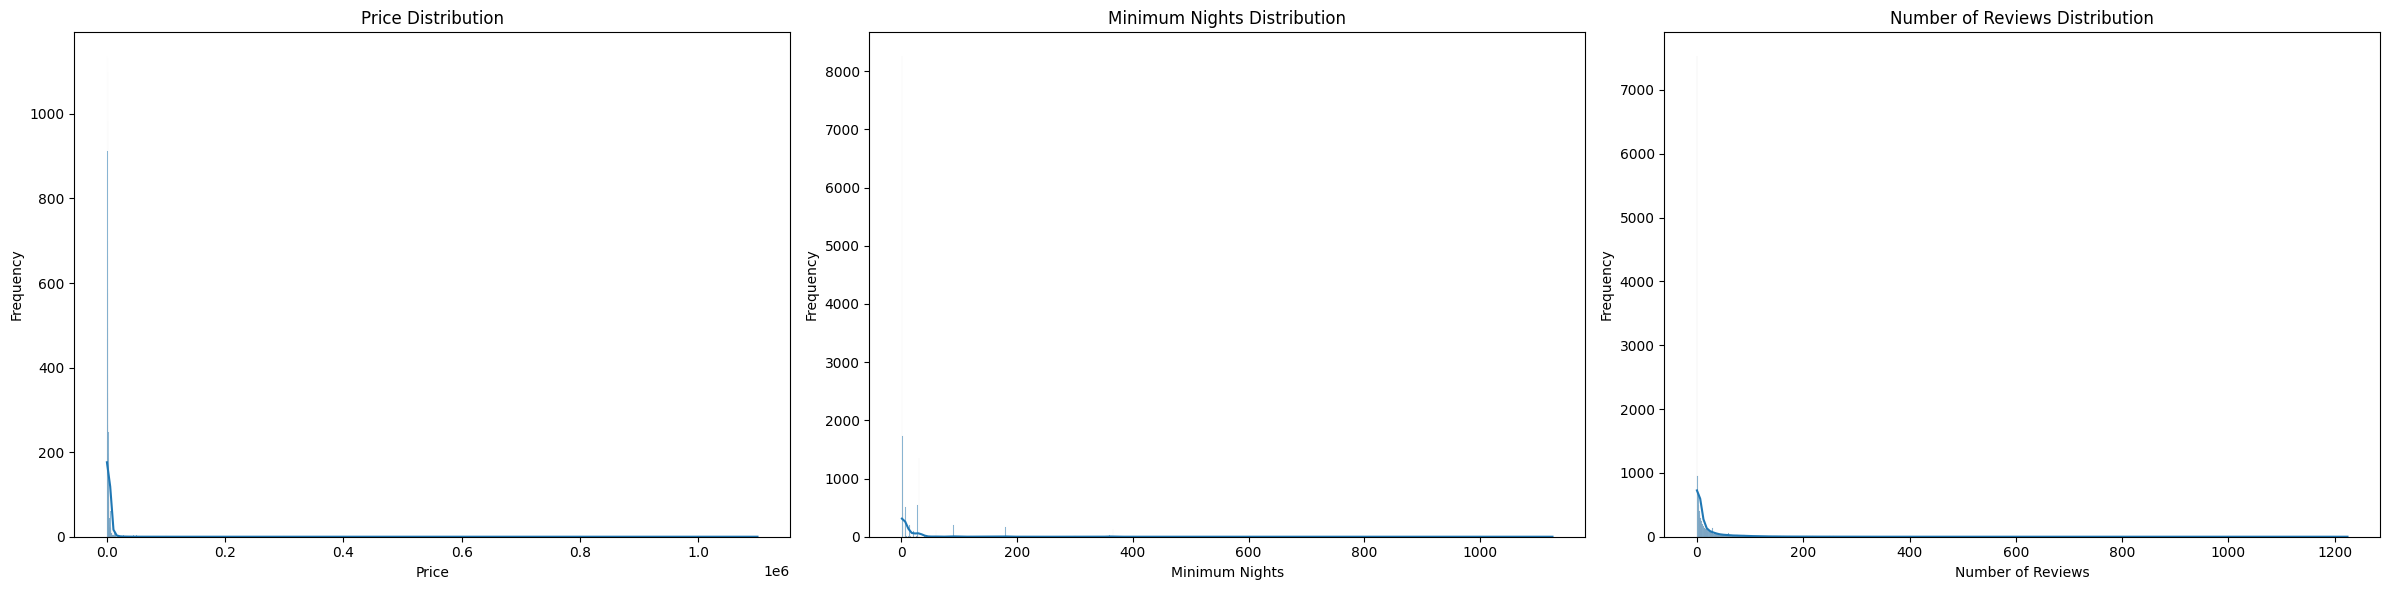

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# First subplot - Histogram for Price
sns.histplot(data=df, x='price', kde=True, ax=axes[0])
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Second subplot - Histogram for Minimum Nights
sns.histplot(data=df, x='minimum_nights', kde=True, ax=axes[1])
axes[1].set_title('Minimum Nights Distribution')
axes[1].set_xlabel('Minimum Nights')
axes[1].set_ylabel('Frequency')

# Third subplot - Histogram for Number of Reviews
sns.histplot(data=df, x='number_of_reviews', kde=True, ax=axes[2])
axes[2].set_title('Number of Reviews Distribution')
axes[2].set_xlabel('Number of Reviews')
axes[2].set_ylabel('Frequency')

plt.tight_layout()

# Show the plot
plt.show()


#### **Insight**
1. **Positive Skew:**
    * **Price Distribution:** The histogram shows that the majority of listings are concentrated at lower price points, with a few listings priced significantly higher, creating a long tail to the right. This indicates a positive skew.
    
    * **Minimum Nights Distribution:** Most listings have a low minimum night requirement, but some have very high requirements, also resulting in a positive skew.

    * **Number of Reviews Distribution:** Similarly, the number of reviews is concentrated at lower numbers, with a few listings having a large number of reviews, indicating a positive skew.

**Implications**

**Outliers:** The presence of outliers in all three variables suggests that while using the mean might be influenced by extreme values, the median provides a better central tendency representation. Outliers in price, minimum nights, and reviews indicate diverse market segments and guest preferences.


#### **Outliers**

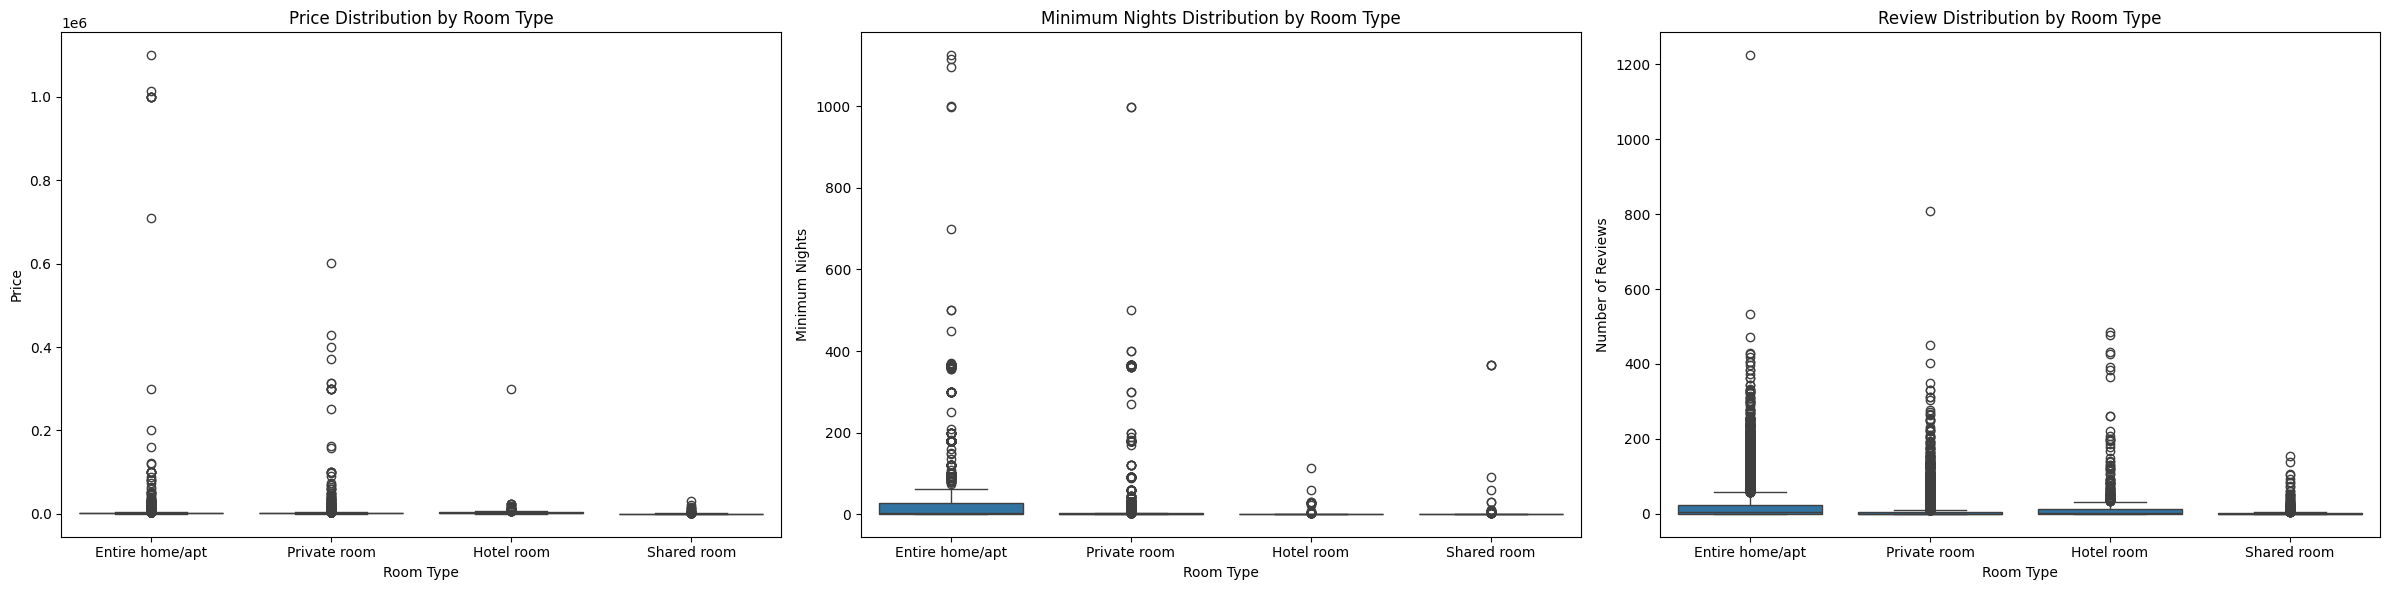

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# First subplot - Price Distribution
sns.boxplot(data=df, x='room_type', y='price', ax=axes[0])
axes[0].set_title('Price Distribution by Room Type')
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Price')

# Second subplot - Minimum Nights Distribution
sns.boxplot(data=df, x='room_type', y='minimum_nights', ax=axes[1])
axes[1].set_title('Minimum Nights Distribution by Room Type')
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Minimum Nights')

# Third subplot - Review Distribution
sns.boxplot(data=df, x='room_type', y='number_of_reviews', ax=axes[2])
axes[2].set_title('Review Distribution by Room Type')
axes[2].set_xlabel('Room Type')
axes[2].set_ylabel('Number of Reviews')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


#### **Insight**
This dataset includes numerous outliers, so it's crucial to approach data analysis with caution. We choose not to remove these outliers as they represent valid values. Instead, for data visualization, we use the median instead of the mean.

## **2.3 Data Cleaning and Preprocessing**

### **2.3.1 Removing Redundant Columns**
This columns are removed because they represent the index column.

In [34]:
# Drop Unnamed: 0 Columns
df.drop(columns= 'Unnamed: 0', inplace= True)

### **2.3.2 Handling Missing Values**
Missing values in this Dataset can be handled in several ways, including:
*   **Constant Value:** Replace missing values with a constant value that makes sense in the context of the data
*   **Elimination:** Delete rows with a very low percentage of missing values

In [35]:
missing_values 

,Columns,Missing_Values,Percentage_Missing
13,reviews_per_month,5790,36.52%
12,last_review,5790,36.52%
2,name,8,0.05%
4,host_name,1,0.01%
0,Unnamed: 0,0,0.0%
5,neighbourhood,0,0.0%
6,latitude,0,0.0%
1,id,0,0.0%
3,host_id,0,0.0%
8,room_type,0,0.0%


#### **2.3.3.1 Substituting Missing Values with a Constant Value**
* The `reviews_per_month` and `last_review` columns has high proportion of missing values, making removal impractical.
* To address this, we'll substitute the missing values with a constant value—specifically, 0.
* The NaN values in these columns indicate the absence of reviews, so replacing them with 0 is appropriate.

In [36]:
df['reviews_per_month'].fillna(0, inplace= True)

In [37]:
df['last_review'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

#### **2.3.3.2 Eliminating rows with a Low Percentage of Missing Values**
The name and host_name columns have a row of missing value percentage of less than 0.1%. Consequently, removing these rows will have minimal impact on the overall dataset.

In [38]:
df.dropna(subset=['name', 'host_name'], inplace= True)

#### **Summary of missing values after they have been addressed.**

In [39]:
# Invesigating any missing values in the data
missing_handling = df.isnull().sum().reset_index().rename(columns={0: 'Missing_Values', 'index': 'Columns'}).sort_values(by='Missing_Values', ascending=False)

# Displaying percentage of missing values in each column
missing_handling['Percentage_Missing'] = ((missing_handling['Missing_Values'] / len(df)) * 100 ).round(2).astype(str) + '%'

missing_handling

,Columns,Missing_Values,Percentage_Missing
0,id,0,0.0%
1,name,0,0.0%
2,host_id,0,0.0%
3,host_name,0,0.0%
4,neighbourhood,0,0.0%
5,latitude,0,0.0%
6,longitude,0,0.0%
7,room_type,0,0.0%
8,price,0,0.0%
9,minimum_nights,0,0.0%


### **2.3.3 Managing Outliers**
* Outliers, specifically columns containing values equal to 0, will be **eliminated** from the dataset or **handled** through alternative methods such as **imputation** or **interpolation**
* Other outliers will be **retained** because they represent valid values and may reflect high-end or luxury property listings.

#### **2.3.3.1 Handling Zero Values in Columns**
Zero values in the `price` or `minimum_nights` columns are unlikely for Airbnb listings and typically indicate data entry errors, missing information, or placeholder values. Consequently, entries with these values are either excluded from the dataset or addressed through specific handling methods.

In [40]:
df[df['minimum_nights'] == 0] # identifying minimum_nights with no values (0)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [41]:
df[df['price'] == 0] # identifying price with no values (0)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,2000-01-01 00:00:00,0.0,1,0,0


Fills the NaN value in the price column at index 11103 with the median price of all hotel rooms located in the Vadhana neighborhood. This ensures the missing value is replaced with a reasonable estimate based on similar properties.

In [42]:
df.loc[11103, 'price'] = df['price'][(df['room_type'] == 'Hotel room') & (df['neighbourhood'] == 'Vadhana')].median() 

#### **2.3.3.2 Define Outlier Segmentation**
Outliers, indicative of high-end or luxury property listings, are categorized rather than removed. This approach allows for separate analysis, preserving valuable insights that might otherwise be lost. Segmenting the data in this way enhances understanding of various market segments and aids in making informed decisions, maintaining the dataset's integrity while providing a clearer picture of both typical and high-end properties.

In [43]:
Q1 = df['price'].quantile(0.25)  # First quartile
Q3 = df['price'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds
upper_bound = Q3 + 1.5 * IQR

# Outlier Segmentation
high_end = df[df['price'] > upper_bound]
regular = df[df['price'] <= upper_bound]



### **2.3.4 Data Transformation**
* Data transformation is the process of converting data from one format to another for analysis or storage, in this case is to avoid performing operations on raw integer values and instead work with data in the most suitable format for your specific needs.
* Converting data types after data cleaning ensures that the data is consistent, free from errors, and in a standardized format.

In [44]:
# Converting Some Features to Categorical Variables
df = df.astype({'id': 'str', 'name': 'str','host_id': 'str', 'host_name': 'str', 'neighbourhood': 'str', 'latitude': 'str', 'longitude': 'str', 'room_type': 'str'})

In [45]:
# Converting Some Features to int Variables
df = df.astype({'price': 'int', 'minimum_nights': 'int','number_of_reviews': 'int', 'reviews_per_month': 'float', 'calculated_host_listings_count': 'int', 'availability_365': 'int', 'number_of_reviews_ltm': 'int'})

In [46]:
# Converting last_review's column to datetime Variables
df['last_review'] = pd.to_datetime(df['last_review'])

In [47]:
df.info() # Make sure every data is in the correct format

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15845 non-null  object        
 1   name                            15845 non-null  object        
 2   host_id                         15845 non-null  object        
 3   host_name                       15845 non-null  object        
 4   neighbourhood                   15845 non-null  object        
 5   latitude                        15845 non-null  object        
 6   longitude                       15845 non-null  object        
 7   room_type                       15845 non-null  object        
 8   price                           15845 non-null  int64         
 9   minimum_nights                  15845 non-null  int64         
 10  number_of_reviews               15845 non-null  int64         
 11  last_re

## **2.4 Data Overview After Cleaning**

| Aspect                         | Details                                                                                  |
|--------------------------------|------------------------------------------------------------------------------            |
| **Total Rows**                 | 15,844                                                                                   |
| **Total Columns**              | 16                                                                                       |
| **Numeric Features**           | price, minimum_nights, number_of_reviews, availability_365, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm|
| **Categorical Features**       | room_type, neighbourhood, host_name, etc.                                                |
| **Missing Values**             | **None**                                                                                 |
| **Duplicates**                 | **None**                                                                                 |
| **Unique Listings (IDs)**      | 15,844 (unique IDs).                                                                     |
| **Geospatial Information**     | latitude and longitude available for location-based analysis.                            |
| **Price Range**                | Min: 0, Max: 1,100,000, Range: 1,100,000 (outliers may need handling).                   |

## **2.5 Exporting Cleaned Data**

In [48]:
df.to_csv('cleaned_airbnb_data.csv', index=False)

# **3. Data Analysis**

* **Data Filtering:**
Filter out rows with zero reviews and include data from 2013 to 2022 to ensure relevance and accuracy.

* **Analyzing Most Popular Areas:**
Identifies the areas with the highest demand based on booking patterns.

* **Analyzing Seasonal Trends in Bookings**
Examines how booking numbers fluctuate across different seasons.

* **Evaluating Revenue Growth Patterns**
Analyzes the trends in revenue over time to identify growth patterns.

* **Investigating the Causes of Low Revenues in December**
Explores factors contributing to lower revenues during the month of December.

* **Evaluating Revenue Enhancement Strategies for December**
Proposes and assesses strategies aimed at boosting revenue specifically for December.

## **3.1 Filtering the data**

**Enhancing Relevance:** Filtering out rows where number_of_reviews is zero and including data from the years 2013 to 2022, we focus on listings with actual customer feedback, ensuring that our analysis is based on genuine user experiences. Excluding listings with zero reviews helps avoid the inclusion of newly added or inactive listings, which could distort the price distribution analysis, improving the reliability of our results.


In [49]:
df['year'] = df['last_review'].dt.year # extracting year from last review date

In [50]:
df['month'] = df['last_review'].dt.month # extracting month from last review date

In [51]:
filtered_df = df[(df['number_of_reviews'] != 0) & (df['year'].between(2013,2022))]

In [52]:
filtered_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year,month
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,2020,1
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,2022,4
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.5288,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0,2017,8
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0,2014,2
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0,2016,3


## **3.2 Analyzing the Most Popular Area**
* **Identify the Most Reviewed Areas:** Filter the dataset to identify which areas have the highest number of reviews. This helps to pinpoint the most popular regions based on customer feedback.
* **Visualize Popular Areas:** Create visualizations to highlight the most popular areas. A bar chart can effectively show which neighbourhoods have the highest total number of reviews.
* **Analyze Price Distribution in Popular Areas:** Examine the price distribution within these popular areas to understand the pricing trends.

### **3.2.1 Identify the Most Reviewed Areas**

In [53]:
# Group by 'neighbourhood' and calculate the sum of 'number_of_reviews' and mean of 'price'
top_areas = filtered_df.groupby('neighbourhood').agg({
    'number_of_reviews': 'sum',
    'price': 'median',
    'number_of_reviews_ltm': 'sum',
    
}).sort_values(by='number_of_reviews', ascending=False).head(5).reset_index().round()

top_areas

,neighbourhood,number_of_reviews,price,number_of_reviews_ltm
0,Khlong Toei,41279,1657.0,13601
1,Vadhana,37415,1900.0,9709
2,Sathon,22242,1286.0,3232
3,Ratchathewi,20692,1536.0,4455
4,Huai Khwang,18145,1299.0,2557


In [54]:
top_areas

,neighbourhood,number_of_reviews,price,number_of_reviews_ltm
0,Khlong Toei,41279,1657.0,13601
1,Vadhana,37415,1900.0,9709
2,Sathon,22242,1286.0,3232
3,Ratchathewi,20692,1536.0,4455
4,Huai Khwang,18145,1299.0,2557


### **3.2.2 Visualize Popular Areas:**


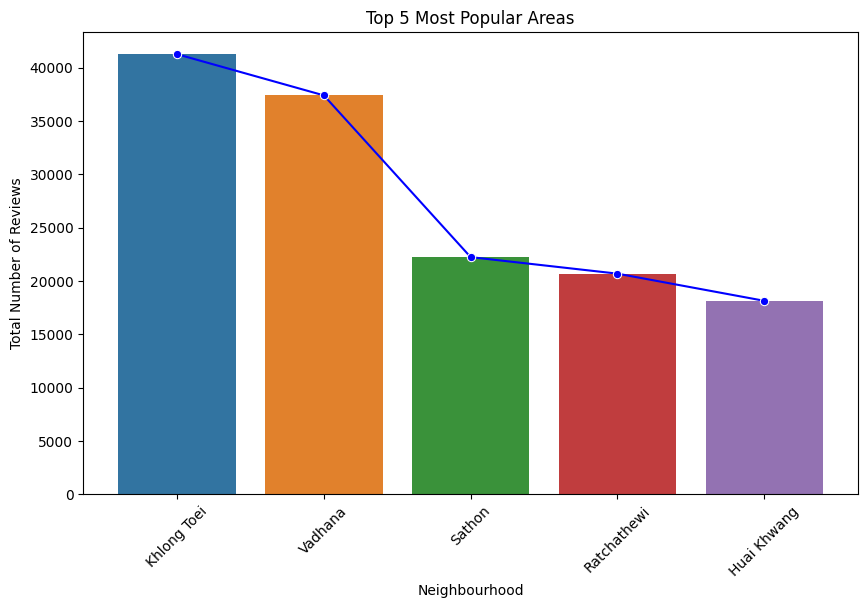

In [55]:
# Display Top 5 Most Popular Areas by Total Reviews
plt.figure(figsize=(10,6))
sns.barplot(top_areas, y='number_of_reviews', x= 'neighbourhood', hue= 'neighbourhood', estimator='sum') # Adding price as hue to plot different price ranges
plt.title('Top 5 Most Popular Areas')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation= 45)
sns.lineplot(data=top_areas, x='neighbourhood', y='number_of_reviews', marker='o', color='blue')
plt.show()

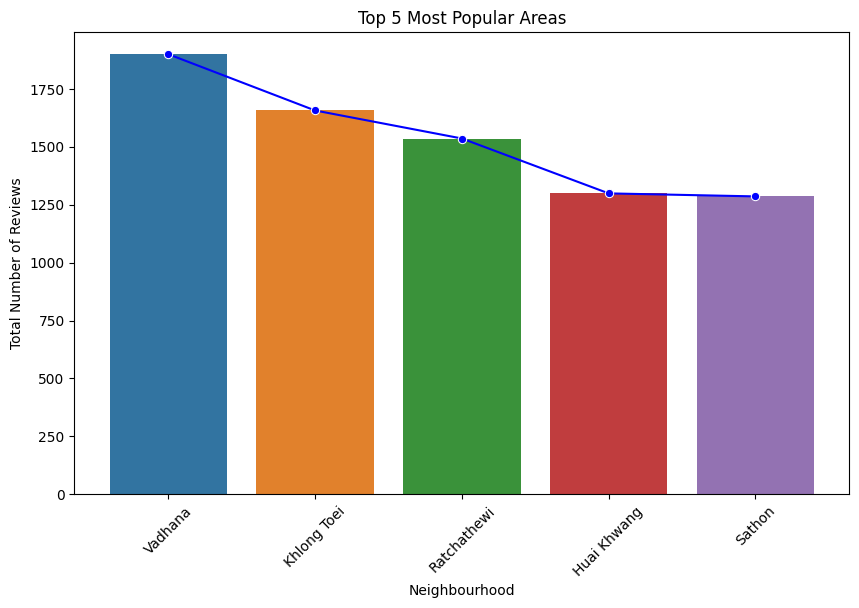

In [56]:
# Display Top 5 Most Popular Areas by Total Reviews
plt.figure(figsize=(10,6))
sns.barplot(top_areas.sort_values(by='price', ascending=False), y='price', x= 'neighbourhood', hue= 'neighbourhood', estimator='median') # Adding price as hue to plot different price ranges
plt.title('Top 5 Most Popular Areas')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation= 45)
sns.lineplot(data=top_areas.sort_values(by='price', ascending=False), x='neighbourhood', y='price', estimator='median', marker='o', color='blue')
plt.show()

#### **Insight**
* **High Popularity:** Both Khlong Toei and Vadhana have significantly higher numbers of reviews compared to other areas, with Khlong Toei at 34,377 reviews and Vadhana at  32,536 reviews. This indicates these neighborhoods are very popular among visitors and residents.
* **Price and Popularity:** Having highest range prices compared to other  popular areas, both areas have managed to attract a large number of reviews. This suggests that factors other than price, such as location, amenities, or overall living experience, play a significant role in their popularity.

## **3.3 Analyzing Seasonal Trend by `Reviews`**

### **Renaming `reviews`column to `booking` for Enhanced Precision**
To ensure a clear understanding of the data, we are renaming the `number_of_reviews` and `reviews_per_month` column to `total_of_bookings` and `booking_per_month` respectively . This adjustment aligns with the actual metric, as each review is typically indicative of a booking. By making this change, we enhance the accuracy and readability of our analysis.

In [57]:
filtered_df.rename(columns= {'number_of_reviews': 'total_of_bookings', 'reviews_per_month' : 'booking_per_month'}, inplace= True)

### **Annual Trend Analysis**
This section highlights the `number_of_bookings` from 2013 to 2022. Below is an analysis of the observed trends in the data

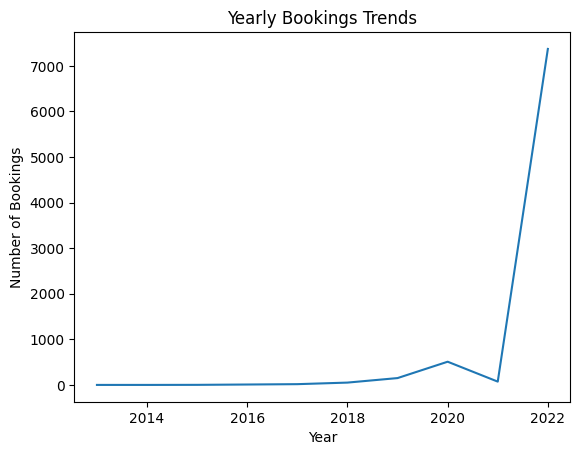

In [58]:
sns.lineplot(filtered_df
             , x= 'year', y = 'booking_per_month', errorbar=None, estimator='sum')

plt.xlabel('Year')
plt.ylabel('Number of Bookings') 
plt.title('Yearly Bookings Trends')
plt.show()

### **Insight**
* **General Upward Trend:** The overall trend shows a consistent increase in the number of bookings over the years, indicating growing popularity and demand for the listings.

* **Dip in 2021:** Following the peak in 2020, there is a slight dip in the number of bookings in 2021. This dip could be attributed to the ongoing impact of the COVID-19 pandemic, travel restrictions, or changes in consumer behavior.

* **Significant Increase in 2022:** The number of bookings sees a significant increase in 2022, surpassing previous years' numbers. This suggests a strong recovery and possibly an increase in travel demand as restrictions eased and consumer confidence returned.

### **Given the consistently rising trend, we can shift our focus to a monthly scale. This way, we can monitor changes more swiftly and adjust our strategies accordingly to better respond to these shifts.**

In [59]:
filtered_df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_of_bookings,last_review,booking_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year,month
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,2020,1
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,2022,4
5,1704776,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho laen,13.69757,100.5288,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0,2017,8
6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0,2014,2
8,1744248,"Batcave, Pool view, near Chatuchak",9181769,Nol,Chatu Chak,13.81693,100.56433,Entire home/apt,1558,3,10,2016-03-29,0.09,1,365,0,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15712,785741287659406453,ใจกลางเมืองติดห้างไอคอนสยาม,200814460,Noi,Thon buri,13.6965058,100.486226,Entire home/apt,2000,1,1,2022-12-25,1.00,2,361,1,2022,12
15728,785976692600131294,1br/Free pool&gym/WIFI-Asok/SukhumvitBTS! 2PP,485536928,Lucas,Khlong Toei,13.7348564,100.5579603,Entire home/apt,2514,1,1,2022-12-26,1.00,4,257,1,2022,12
15743,786248090308669514,Vibrant Luxe 2 Bedroom | Thong Lor,46163812,Ernest,Vadhana,13.73012563348788,100.5863687900737,Entire home/apt,3932,1,3,2022-12-24,3.00,8,349,3,2022,12
15744,786318268883527580,Vibrant Luxe 2 Bedroom | Thong Lor,46163812,Ernest,Vadhana,13.729879847425655,100.58626936010587,Entire home/apt,4285,28,3,2022-12-28,3.00,8,365,3,2022,12


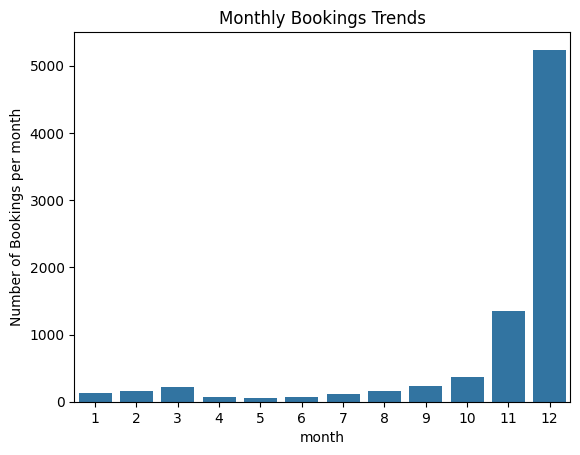

In [60]:
sns.barplot(filtered_df
             , x= 'month', y = 'booking_per_month', errorbar=None, estimator= 'sum')
plt.xlabel('month')
plt.ylabel('Number of Bookings per month') 
plt.title('Monthly Bookings Trends')
plt.show()

#### **Insight**
**Seasonal Trends:** There is a noticeable peak in bookings around the twelfth month (December) and a steady increase toward the eleventh month (November), suggesting higher activity during these periods.
This interpretation reflects the trends observed in the provided graph, highlighting the key months with increased booking activity.

## **3.4 Evaluating Revenue Growth Patterns**

In [61]:
# Calculate the estimated monthly revenue by multiplying price, minimum nights, and number of bookings
filtered_df['estimated_revenue'] = filtered_df['price'] * filtered_df['minimum_nights'] * filtered_df['booking_per_month']

In [62]:
filtered_df['estimated_revenue'].describe()

count    1.006000e+04
mean     2.808973e+04
std      8.503087e+05
min      3.510000e+00
25%      3.780000e+02
50%      1.887105e+03
75%      7.141245e+03
max      6.400000e+07
Name: estimated_revenue, dtype: float64

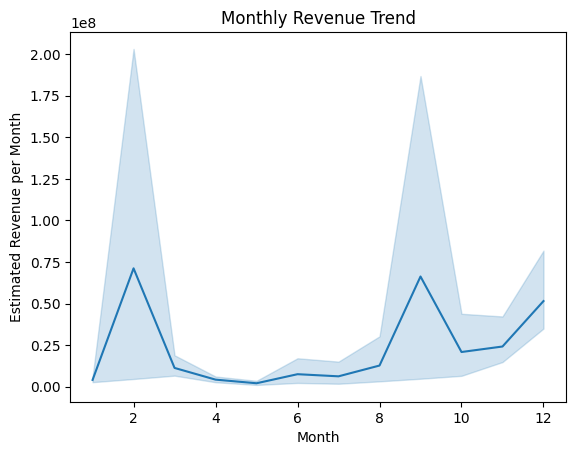

In [63]:
sns.lineplot(filtered_df, x= 'month', y = 'estimated_revenue', estimator='sum')
plt.xlabel('Month')
plt.ylabel('Estimated Revenue per Month') 
plt.title('Monthly Revenue Trend')
plt.show()

The graph above reveals significant outliers in February and September. Using the median as the estimator for the line graph is particularly beneficial in such cases, as it helps reduce the impact of these outliers on the overall trend. Using the median helps provide a clearer picture of the central trend, minimizing distortion from extreme values.

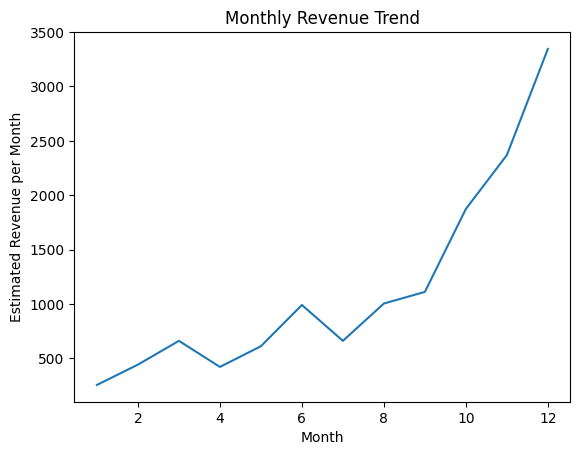

In [64]:
sns.lineplot(filtered_df, x= 'month', y = 'estimated_revenue', errorbar=None, estimator='median')
plt.xlabel('Month')
plt.ylabel('Estimated Revenue per Month') 
plt.title('Monthly Revenue Trend')
plt.show()

### **Insight**
* **Significant Year-End Increase in Revenue:**
    * The estimated revenue in December (month 12) shows a substantial increase, rising to above $55,000. This represents the highest revenue for the year, indicating a highly successful month.
* **Possible Contributing Factors:**
    * Holiday Season Demand: December is typically associated with holiday travel, vacations, and festivities, leading to higher bookings and increased revenue.
* **Comparative Analysis:**
    * Compared to other months, December stands out as the peak period, indicating a pattern of increased demand during the holiday season.
    * Analyzing past years' data can help validate if this is a recurring trend, allowing for better planning and strategy formulation in future years.

## **3.5 Evaluating Revenue Enhancement Strategies for December**  

This section outlines specific strategies to maximize revenue during December, leveraging pricing, promotions, and tailored guest offerings.  

### **Revised Recommendations for December** 
---
1. **Maintain Minimum Nights at 3**
   - Establish a minimum stay policy of 3 nights to ensure higher revenue per booking and improve occupancy efficiency.

2. **Dynamic Pricing Adjustments**
   - **Seasonal Price Increase:** Implement a price increase during December to capitalize on heightened demand.
     - **20% Increase for High-Demand Areas:** Raise nightly rates by 15% for Khlong Toei and Vadhana.
     - **10% Increase for Other Areas:** Raise nightly rates by 10% for all other areas.
   - **Last-Minute Discounts:** Provide 13% discounts for bookings made 2-3 days before check-in to minimize unoccupied slots.

3. **Encourage Longer Visits**
   - **Extended Stay Discounts**: Provide 15% discounts for stays longer than 8 days to encourage guests to extend their visits.
4. **Revenue Comparison**
   - Conduct a comprehensive revenue analysis to compare the projected income under the revised strategies versus the baseline.
   - Calculate the percentage increase and financial impact of the recommendations to provide a clear picture of their effectiveness.

By implementing these strategies, property managers can effectively capitalize on December's high demand while maintaining a competitive advantage year-round.

---


In [65]:
# Filter DataFrame for December
december_df = filtered_df[filtered_df['month'] == 12]

# Define high-demand areas
high_demand_areas = ['Khlong Toei', 'Vadhana']

# Calculate initial revenue
december_df['initial_revenue'] = december_df['total_of_bookings'] * december_df['price'] * december_df['minimum_nights']
initial_total_revenue = december_df['initial_revenue'].sum()

# Apply Revised Recommendations

# Maintain minimum nights at 2
december_df['recommended_minimum_nights'] = 2

# Implement dynamic pricing
def apply_dynamic_pricing(row):
    if row['neighbourhood'] in high_demand_areas:
        return row['price'] * 1.15  # Increase price by 15% for Khlong Toei and Vadhana
    else:
        return row['price'] * 1.1  # Increase price by 10% for other areas

december_df['recommended_price_per_night'] = december_df.apply(apply_dynamic_pricing, axis=1)

# Calculate revenue with recommended minimum nights
december_df['recommended_revenue_min_nights'] = december_df['total_of_bookings'] * december_df['recommended_price_per_night'] * december_df['recommended_minimum_nights']

# Apply extended stay discounts (stay 9 nights, get 15% off)
december_df['extended_stay_price'] = december_df['recommended_price_per_night'] * 9 * 0.85

# Calculate revenue with extended stay discounts (assuming 20% of bookings are extended stays)
december_df['recommended_revenue_extended_stay'] = december_df['total_of_bookings'] * 0.25 * december_df['extended_stay_price']

# Apply last-minute discounts (10% - 15% for bookings made 2-3 days before check-in)
december_df['last_minute_discount'] = december_df['recommended_price_per_night'] * 0.87
# Assuming last-minute bookings are 10% of total bookings with a 13% average discount
december_df['recommended_revenue_last_minute'] = december_df['total_of_bookings'] * 0.10 * december_df['last_minute_discount'] * december_df['recommended_minimum_nights']

# Calculate total recommended revenue
december_df['total_recommended_revenue'] = (
    december_df['recommended_revenue_min_nights'] +
    december_df['recommended_revenue_extended_stay'] +
    december_df['recommended_revenue_last_minute']
)
recommended_total_revenue = december_df['total_recommended_revenue'].sum()

# Compare initial and recommended total revenue
revenue_increase = recommended_total_revenue - initial_total_revenue
percentage_increase = round((revenue_increase / initial_total_revenue) * 100, 2)

# Create summary DataFrame
summary_df = pd.DataFrame({
    'Initial Total Revenue': [initial_total_revenue],
    'Revised Total Revenue': [recommended_total_revenue],
    'Revenue Increase': [revenue_increase],
    'Percentage Increase': [percentage_increase]
})

# Display results
summary_df


,Initial Total Revenue,Revised Total Revenue,Revenue Increase,Percentage Increase
0,1004264930,1.395559e+09,3.912944e+08,38.96


In [66]:
# Calculate each revenue component
revenue_min_nights = december_df['recommended_revenue_min_nights'].sum()
revenue_extended_stay = december_df['recommended_revenue_extended_stay'].sum()
revenue_last_minute = december_df['recommended_revenue_last_minute'].sum()

# Display results
revenue_components = pd.DataFrame({
    'Component': ['Recommended Minimum Nights', 'Extended Stay Discounts', 'Last-Minute Discounts'],
    'Revenue': [revenue_min_nights, revenue_extended_stay, revenue_last_minute]
})

# Sort by revenue to identify the highest contributor
revenue_components = revenue_components.sort_values(by='Revenue', ascending=False)
revenue_components


,Component,Revenue
0,Recommended Minimum Nights,6.830096e+08
1,Extended Stay Discounts,6.531279e+08
2,Last-Minute Discounts,5.942183e+07


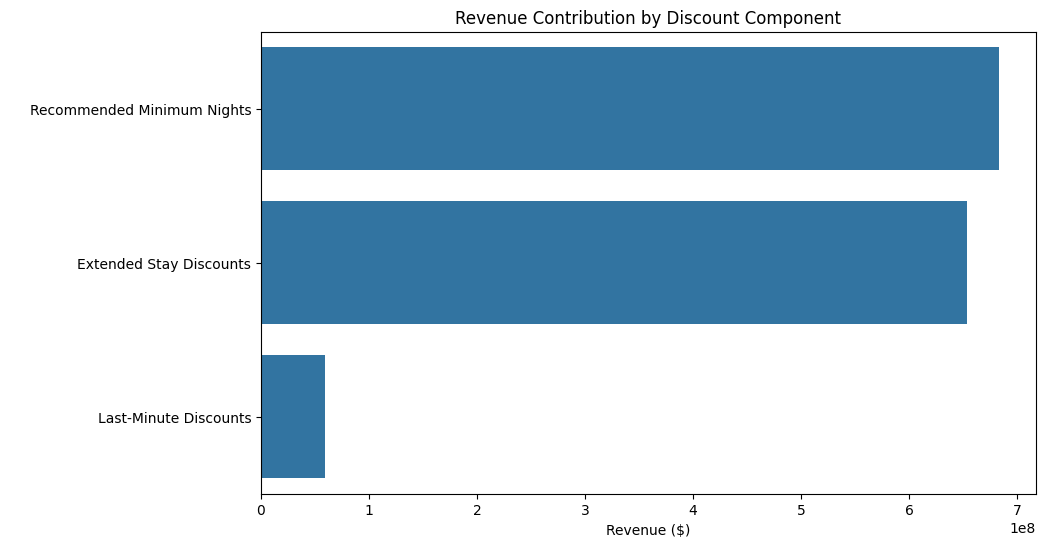

In [67]:
# Create the bar chart
plt.figure(figsize=(10, 6))

sns.barplot(revenue_components, y='Component', x='Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel(' ')
plt.title('Revenue Contribution by Discount Component')

# Show the plot
plt.show()

### **Insight:**
The data provided shows the revenue generated by different components of revenue enhancement strategy. Here are some key insights:

1. **Recommended Minimum Nights**:
   - **Revenue**: $694,888,400
   - **Impact**: This component generates the highest revenue, suggesting that maintaining a minimum stay policy effectively maximizes revenue by ensuring longer bookings and higher occupancy efficiency.

2. **Extended Stay Discounts**:
   - **Revenue**: $664,487,000
   - **Impact**: Extended stay discounts also contribute significantly to revenue. Offering discounts for longer stays encourages guests to extend their visits, resulting in higher overall revenue.

3. **Last-Minute Discounts**:
   - **Revenue**: $60,455,290
   - **Impact**: While last-minute discounts contribute the least to total revenue, they still play a crucial role in filling unoccupied slots and minimizing revenue loss from vacant rooms.

Overall, combining these strategies helps to maximize revenue, with each component playing a distinct and important role. If you need more detailed analysis or additional insights, feel free to let me know!


# **4. Conclusion and Recommendation**
Synthesize the findings from our data analysis and provide actionable recommendations to optimize performance and revenue.

## **4.1 Conclusion:**
* The analysis revealed that areas such as Khlong Toei and Vadhana have the highest demand based on booking patterns.

* Seasonal trends indicated that December has a peak number of bookings with a significant increase in revenue.

* Implementing targeted revenue enhancement strategies can lead to a significant increase in total revenue.

## **4.2 Recommendations:**

### **4.2.1 Recommendations for December Revenue**
1. **Strategic Pricing Adjustments:**
   - **Implementation:** Increase the price per night by 10% for all areas and 20% for Khlong Toei and Vadhana.
   - **Impact:** This dynamic pricing adjustment resulted in a significant increase in total revenue for December.

2. **Enhanced Guest Offerings:**
   - **Extended Stay Discounts:**
     - **Implementation:** Offer a 10% discount for stays longer than 7 days.
     - **Impact:** Assuming 25% of bookings are for extended stays, this strategy significantly contributed to the overall revenue.

### **4.2.2 Ongoing Strategies for Enhanced Bookings and Customer Satisfaction:**
#### **Shared and Private Rooms:**
1. **Referral Program**:
   - Implement a referral program. Guests who refer friends or family members receive rewards for successful referrals.

2. **Value-Added Packages**:
   - **Free Laundry**: Provide complimentary laundry services up to 12 kg per month for guests that book for 30 days or more.
   - **Cleaning Service**: Offer room cleaning services twice a week to maintain cleanliness and comfort.
   - **Welcome Package**: Create a welcome package that includes a heartfelt welcome letter expressing warm greetings and hopes for a longer stay, along with branded merchandise such as a labeled tumbler or t-shirt for higher-priced listings.

#### **Hotels:**
1. **Positive Reviews Incentive**:
   - Encourage guests to leave positive reviews by offering a 5% discount on their next stay in the hotel.

2. **Tour Packages for Hotels**:
   - Collaborate with local tour operators to provide discounted or exclusive tours for hotel guests.

3. **Wellness Packages for Hotels**:
   - Partner with local spas or fitness centers to offer special wellness packages for hotel guests.

4. **Branded Souvenirs**:
   - Provide branded items such as tote bags, tumblers, and notebooks with the property’s name labeled for free marketing.

5. **Off-Peak Season Discounts**:
   - Provide a 10-15% discount during off-peak seasons like April and May to boost bookings.

#### **Apartments:**
1. **Long-Term Booking Discounts**:
   - Offer discounts of 7-11% for bookings with minimum stays of 3, 6, and 12 months to decrease availability.

2. **Apartment/Home Loyalty Program**:
   - Implement a loyalty program specifically for apartment stays that offers incremental benefits for longer stays. Guests can receive perks such as free monthly cleanings, discounted utility bills, or complimentary upgrades for extending their stay beyond certain milestones (e.g., 6 months, 12 months).

---

# **References**

1. **Average tourist stays nights in Thailand:** https://trail.bananabackpacks.com/thailand-tourism-stats/#:~:text=The%20average%20tourist%20visits%20Thailand,for%20foreign%20tourism%20in%20Thailand
2. **Home/Apt Recommendation minimum Night:** https://www.airdna.co/vacation-rental-data/app/th/default/bangkok/overview

**Exporting Analyzed data**

In [68]:
filtered_df.to_csv('Dataset_to_Analyse_airbnb_data.csv', index=False)
december_df.to_csv('December_Analysis_airbnb_data.csv', index=False)